<a href="https://colab.research.google.com/github/KavyaGarapati/KAVYAGARAPATI-HOMEWORK-3/blob/master/Problem_3%2C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-19 19:14:50--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   134MB/s    in 0.5s    

2019-04-19 19:14:51 (134 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
from keras.applications import VGG19

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224, 224, 3))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 1s 0us/step


In [0]:
conv_base.trainable = False
for layer in conv_base.layers:
  layer.trainable = False

In [0]:
from keras import layers
from keras import models
from keras import optimizers


last_layer = conv_base.get_layer('block5_pool').output

network = layers.Flatten()(last_layer)
network = layers.Dense(256, activation='relu')(network)
network = layers.Dense(1, activation='sigmoid')(network)

model = models.Model(conv_base.input, network)

#model = models.Sequential()
#model.add(conv_base)
#model.add(layers.Flatten())
#model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.1))
#model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 39s 392ms/step - loss: 0.5911 - acc: 0.6740 - val_loss: 0.5597 - val_acc: 0.6880
Epoch 2/30
100/100 [==============================] - 35s 349ms/step - loss: 0.4572 - acc: 0.7980 - val_loss: 0.3671 - val_acc: 0.8230
Epoch 3/30
100/100 [==============================] - 33s 334ms/step - loss: 0.4254 - acc: 0.8020 - val_loss: 0.3361 - val_acc: 0.8580
Epoch 4/30
100/100 [==============================] - 34s 344ms/step - loss: 0.3890 - acc: 0.8235 - val_loss: 0.3752 - val_acc: 0.8180
Epoch 5/30
100/100 [==============================] - 34s 343ms/step - loss: 0.3830 - acc: 0.8230 - val_loss: 0.2502 - val_acc: 0.9010
Epoch 6/30
100/100 [==============================] - 35s 351ms/step - loss: 0.3686 - acc: 0.8375 - val_loss: 0.2589 - val_acc: 0.8920
Epoch 7/30
100/100 [==============================] - 34s 

**Fine Tuning**

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
model.compile(
    loss='binary_crossentropy',
    
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])


history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 38s 385ms/step - loss: 0.2779 - acc: 0.8795 - val_loss: 0.1964 - val_acc: 0.9210
Epoch 2/30
100/100 [==============================] - 35s 352ms/step - loss: 0.2192 - acc: 0.9105 - val_loss: 0.1405 - val_acc: 0.9420
Epoch 3/30
100/100 [==============================] - 35s 348ms/step - loss: 0.1874 - acc: 0.9235 - val_loss: 0.1448 - val_acc: 0.9480
Epoch 4/30
100/100 [==============================] - 35s 351ms/step - loss: 0.1690 - acc: 0.9300 - val_loss: 0.1451 - val_acc: 0.9460
Epoch 5/30
100/100 [==============================] - 36s 356ms/step - loss: 0.1644 - acc: 0.9330 - val_loss: 0.1429 - val_acc: 0.9430
Epoch 6/30
100/100 [==============================] - 34s 345ms/step - loss: 0.1456 - acc: 0.9430 - val_loss: 0.0938 - val_acc: 0.9690
Epoch 7/30
100/100 [==============================] - 35s 350ms/step - loss: 0.1219 - acc: 0.9535 - val_loss: 0.1577 - val_acc: 0.9480
Epoch 8/30
100/100 [==============================] - 3

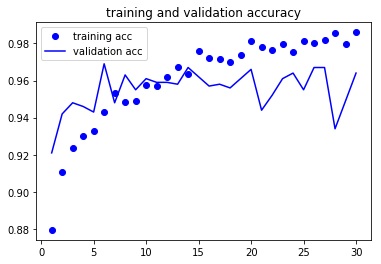

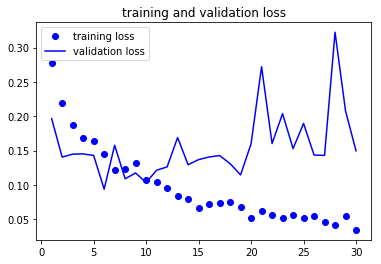

Validation loss: 0.16443514641303408
Validation accuracy: 0.9679999923706055


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

In [0]:
last_conv_layer = model.get_layer('block5_conv3')

In [0]:
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions

In [0]:
!ls /tmp/cats_and_dogs_filtered/validation/cats | head -4
!ls /tmp/cats_and_dogs_filtered/validation/dogs | head -4

cat.2000.jpg
cat.2001.jpg
cat.2002.jpg
cat.2003.jpg
dog.2000.jpg
dog.2001.jpg
dog.2002.jpg
dog.2003.jpg


In [0]:
def show_superimposed_image(img_path, heatmap):

  img = cv2.imread(img_path)
  # resize the heatmap to be the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = np.uint8(255 * heatmap)

  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = heatmap * 0.4 + img

  cv2_imshow(superimposed_img)

In [0]:
def process_image(img_path, idx=0):
  img = image.load_img(img_path, target_size=(224, 224))
  #
  plt.imshow(img)
  plt.grid(None)
  plt.show()
  #
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  #
  preds = model.predict(x)
  #print('Predicted:', decode_predictions(preds, top=3)[0])
  #
  #class_index = np.argmax(preds[0])
  
  class_index = np.argsort(preds[0])[-(1+idx)]
  
  class_output = model.output[:, class_index]
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]

  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  #for i in range(512):
  #  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  plt.matshow(heatmap)
  plt.grid(None)
  plt.show()
  show_superimposed_image(img_path, heatmap)

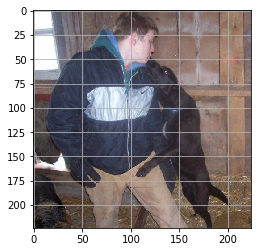

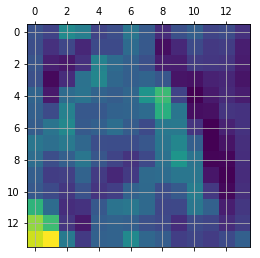

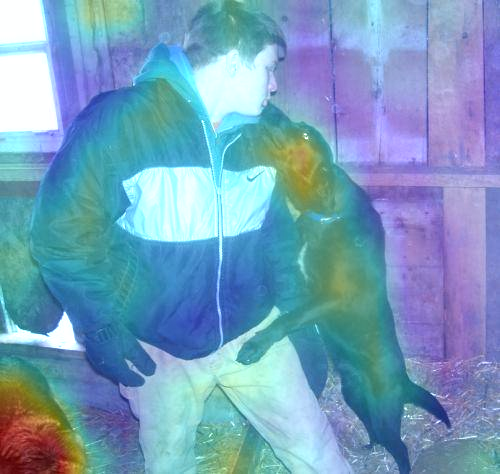

In [0]:
process_image('/tmp/cats_and_dogs_filtered/validation/dogs/dog.2003.jpg')


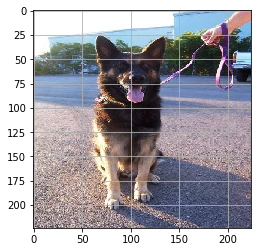

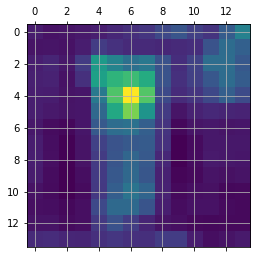

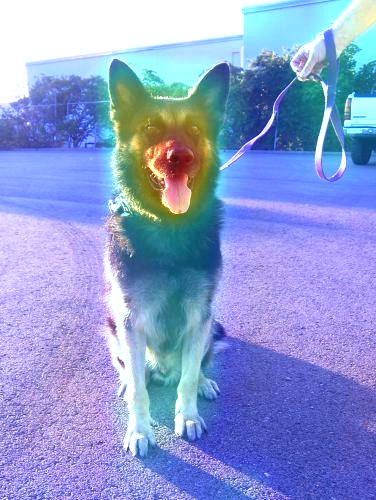

In [0]:
process_image('/tmp/cats_and_dogs_filtered/validation/dogs/dog.2002.jpg')


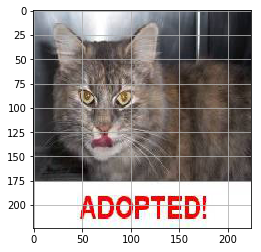

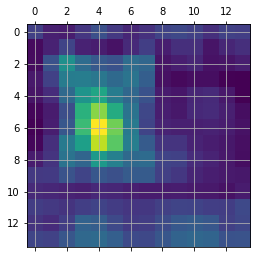

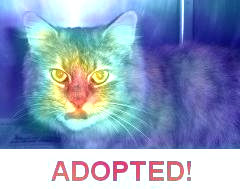

In [0]:
process_image('/tmp/cats_and_dogs_filtered/validation/cats/cat.2003.jpg')


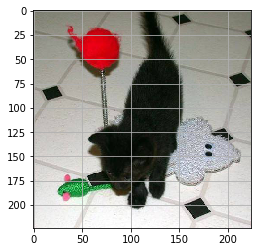

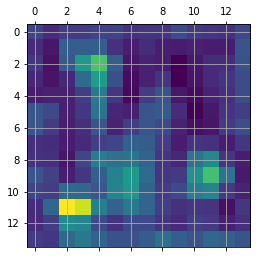

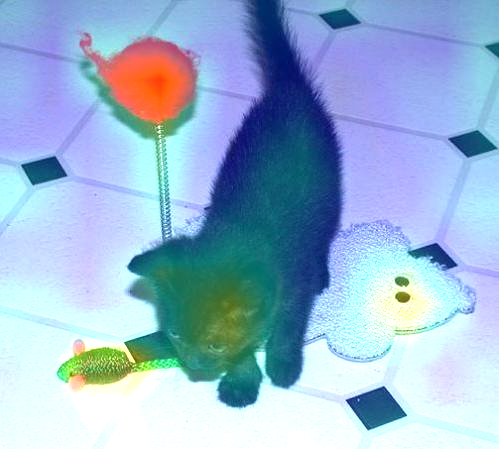

In [0]:
process_image('/tmp/cats_and_dogs_filtered/validation/cats/cat.2002.jpg')


**problem 4**

In [0]:
img_path = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2003.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

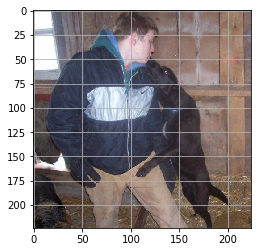

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.grid(None)
plt.show()

In [0]:
model.predict(img_tensor)

array([[0.85149544]], dtype=float32)

In [0]:
#from keras import models

layer_outputs = [layer.output for layer in model.layers[1:25]]

activation_model = models.Model(input=model.input, outputs=layer_outputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`
  after removing the cwd from sys.path.


In [0]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

In [0]:
second_layer_activation = activations[0]

In [0]:
def visualize_activation_model(layerIndex):
  
  layer_name = model.layers[layerIndex].name
  
  images_per_row = 16
  
  layer_activation = activations[layerIndex-1]
  n_features = activations[layerIndex-1].shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      
      channel_image = channel_image.mean()
      if(channel_image.std() != 0):
        channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[
          col * size : (col + 1) * size,
          row * size : (row + 1) * size] = channel_image


  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
      

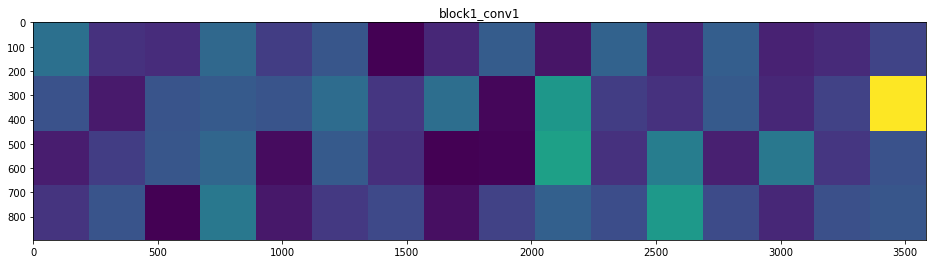

In [0]:
visualize_activation_model(1)

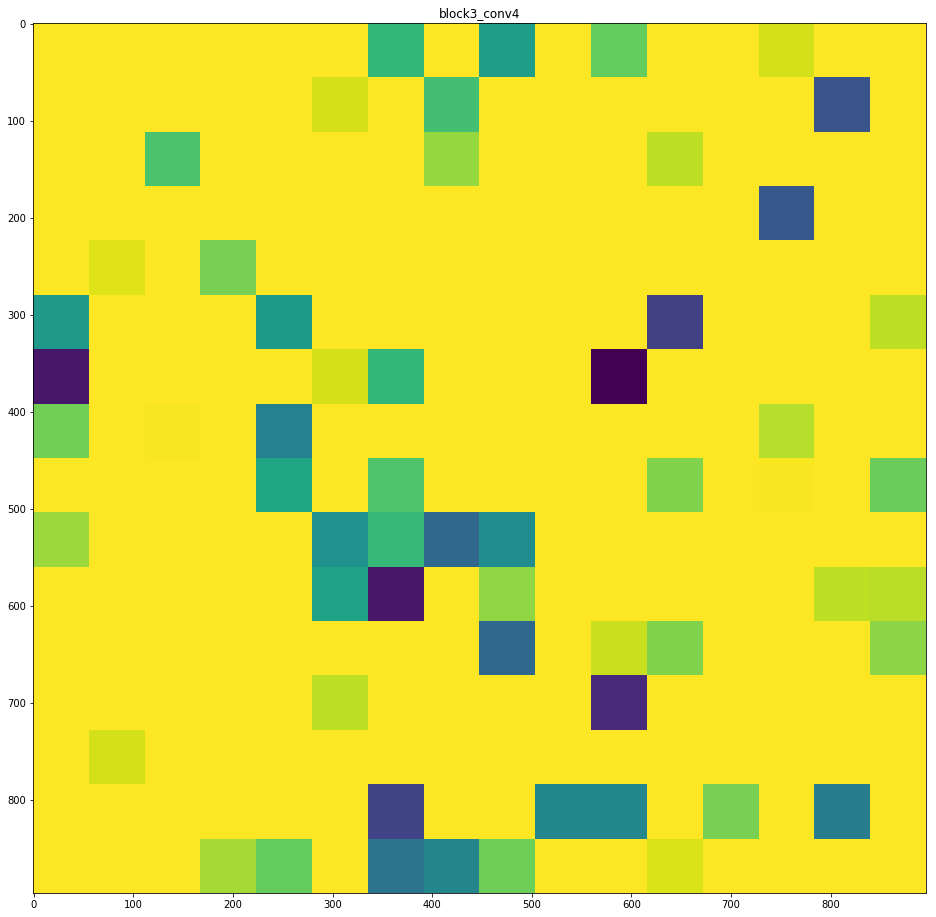

In [0]:
visualize_activation_model(10)

In [0]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras import models

In [0]:
train_cat_fnames = os.listdir(train_cats_dir)
print (train_cat_fnames[:4])
val_cat_fnames = os.listdir(validation_cats_dir)
print (val_cat_fnames[:4])

train_dog_fnames = os.listdir(train_dogs_dir)
print (train_dog_fnames[:4])

val_dog_fnames = os.listdir(validation_dogs_dir)
print (val_dog_fnames[:4])

['cat.167.jpg', 'cat.218.jpg', 'cat.921.jpg', 'cat.535.jpg']
['cat.2116.jpg', 'cat.2119.jpg', 'cat.2146.jpg', 'cat.2229.jpg']
['dog.426.jpg', 'dog.464.jpg', 'dog.195.jpg', 'dog.887.jpg']
['dog.2254.jpg', 'dog.2322.jpg', 'dog.2421.jpg', 'dog.2388.jpg']


In [0]:
layer = model.get_layer('dense_1')
layer_output = layer.output

In [0]:
from keras.preprocessing import image
import numpy as np

image_tensors = []
original_labels = []

val_cat_fnames = os.listdir(validation_cats_dir)
val_dog_fnames = os.listdir(validation_dogs_dir)
#loading validation images (500 cats, 500 dogs)
next_cat_pix = [os.path.join(validation_cats_dir, fname) 
                for fname in val_cat_fnames[0:]]
next_dog_pix = [os.path.join(validation_dogs_dir, fname) 
                for fname in val_dog_fnames[0:]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
      
  true_label = (img_path)[39:42]
  original_labels.append(true_label)
  
  pred_img = image.load_img(img_path, target_size=(224,224))
  img_tensor = image.img_to_array(pred_img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  image_tensors.append(img_tensor)
  


In [0]:
class_names = ['Cats','Dogs']

In [0]:
layer = model.get_layer('dense_1')
layer_output = layer.output

In [0]:
activation_model = models.Model(input=model.input, outputs=[layer_output])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.


In [0]:
image_tensors = np.asarray(image_tensors)
image_tensors_array = np.concatenate((image_tensors))
print ("image_tensors_array.shape=",image_tensors_array.shape)

image_tensors_array.shape= (1000, 224, 224, 3)


In [0]:
activations = activation_model.predict(image_tensors_array)
print ("activations.shape=",activations.shape)

activations.shape= (1000, 256)


In [0]:
import matplotlib.patheffects as PathEffects
import seaborn as sns
%matplotlib inline

class_names = ['cats', 'dogs']

for idx in range(len(class_names)):
  print(idx, ":", class_names[idx])

# Visualization of the feature vectors produce by the convnet
def data_scatter(vecs, labels):
    num_classes = len(np.unique(labels))
  
    palette = np.array(sns.color_palette("husl", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(vecs[:, 0], vecs[:, 1], c=palette[labels])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # legend
    txt_cat = ax.text(-10, -30, class_names[0], fontsize=22, color = 'red')
    txt_cat.set_path_effects([PathEffects.Stroke(linewidth=6, foreground="w"),PathEffects.Normal()])
    txt_dog = ax.text(15, 30, class_names[1], fontsize=22, color = 'red')
    txt_dog.set_path_effects([PathEffects.Stroke(linewidth=6, foreground="w"),PathEffects.Normal()])

0 : cats
1 : dogs


In [0]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=42).fit_transform(activations)

print('Time elapsed: {} seconds'.format(time.time() - time_start))

Time elapsed: 5.828382730484009 seconds


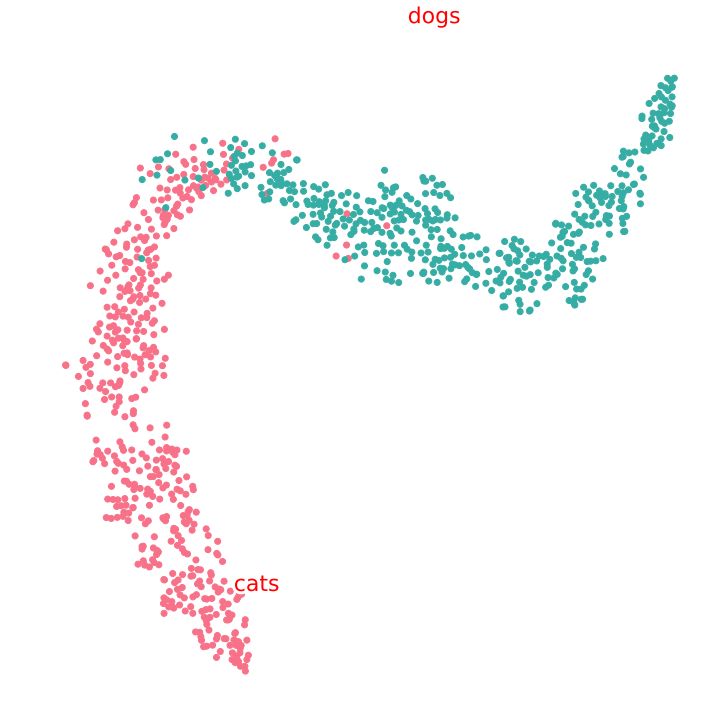

In [0]:
import matplotlib.pyplot as plt
# formatting the labels
for i in range(len(original_labels)):
  if original_labels[i] == 'cat': original_labels[i] = 0
  if original_labels[i] == 'dog': original_labels[i] = 1

# visualize t-SNE output
data_scatter(fashion_tsne, original_labels)